In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from skimage import exposure
import pandas as pd

import os
from tqdm import tqdm
import pickle

import imutils
from imutils.contours import sort_contours
from random import randint
import pytesseract as tesseract

In [11]:
def cv2_imshow(img, title='Image', size=None):
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  if size is not None:
    plt.figure(figsize=size)
  plt.imshow(img)
  plt.title(title)
  plt.show()

In [12]:
def reflection(img):
  hsv_image = cv.cvtColor(img, cv.COLOR_BGR2HSV)
  h, s, v = cv.split(hsv_image)

  clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
  v = clahe.apply(v)

  hsv_image = cv.merge([h, s, v])
  return cv.cvtColor(hsv_image, cv.COLOR_HSV2BGR)

In [13]:
path = './Kelompok 6'
# menampung array untuk gambar
plates = []

lst = os.listdir(path)
lst.sort()
for img in tqdm(lst):  # kita ambil semua isi dalam folder
  try:
    img_array = cv.imread(os.path.join(path, img))  # kita baca image nya
    plates.append(img_array)
  except Exception as e:
    pass

 27%|██▋       | 4/15 [00:00<00:00, 14.09it/s]

100%|██████████| 15/15 [00:01<00:00, 14.71it/s]


In [14]:
image_ktm = plates[randint(0, len(plates)-1)]

img_gray = cv.cvtColor(image_ktm, cv.COLOR_BGR2GRAY)

In [15]:
def tesseract_ocr_to_dataframe(img):
    # Convert the image to RGB format (required by Tesseract)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Perform OCR using Tesseract with image_to_data
    result = tesseract.image_to_data(
        img_rgb, output_type=tesseract.Output.DICT, lang='ind')

    # Create a DataFrame from the Tesseract output
    df = pd.DataFrame(result)

    return df

In [16]:
def draw_contours(img, df):
    extracted = img.copy()
    # Iterate through the Tesseract OCR results and draw contours
    for i in range(len(df['level'])):
        x, y, w, h = df['left'][i], df['top'][i], df['width'][i], df['height'][i]
        cv.imwrite(f'./hallo/ex{i}.jpg', extracted[y:y+h, x:x+w])
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)


    # Display the image with contours
    cv2_imshow(img, size=(4, 5))

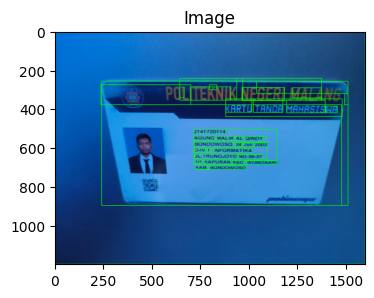

In [17]:
df = tesseract_ocr_to_dataframe(img_gray)
draw_contours(image_ktm, df)